In [5]:
import pandas as pd

In [6]:
# importar csv con delimitador pipe y codificacion ansi
logdf_orig = pd.read_csv('LogisticData.txt',delimiter='|',encoding='ansi')

In [7]:
logdf_orig.shape    # --> el df inicialmente tiene 801705 lineas y 40 columnas

(801705, 40)

In [8]:
# vemos lkas estadísticas de los datos numericos
logdf_orig.describe()

,GEST,NRO,LARGO,ANCHO,ALTO,IT,CMAS,CINN,CANTIDAD,BULTOS,CANMAS,CANUNI,NUMCAJ,CANORIG
count,801705.000000,801705.000000,0.0,0.0,0.0,8.017050e+05,801705.000000,440228.000000,801705.000000,249950.000000,243589.000000,244678.000000,197380.000000,615335.000000
mean,2022.512303,5504.544041,NaN,NaN,NaN,1.380488e+06,29.350937,4.928544,16.100984,45.736539,0.328233,8.394862,50.468543,14.088614
std,0.499849,3309.458981,NaN,NaN,NaN,1.353566e+06,50.995959,6.903372,83.551120,505.610482,0.910521,20.141989,40.426863,45.886587
min,2022.000000,1.000000,NaN,NaN,NaN,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2022.000000,2665.000000,NaN,NaN,NaN,3.600000e+05,10.000000,1.000000,4.000000,6.000000,0.000000,2.000000,19.000000,4.000000
50%,2023.000000,5378.000000,NaN,NaN,NaN,9.800000e+05,12.000000,2.000000,8.000000,11.000000,0.000000,6.000000,43.000000,8.000000
75%,2023.000000,8433.000000,NaN,NaN,NaN,2.000000e+06,24.000000,6.000000,15.000000,20.000000,0.000000,12.000000,73.000000,12.000000
max,2023.000000,11471.000000,NaN,NaN,NaN,1.333000e+07,800.000000,100.000000,48000.000000,23540.000000,100.000000,2000.000000,346.000000,5000.000000


In [9]:
# vemos las características de cada columna
logdf_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801705 entries, 0 to 801704
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REC       801705 non-null  object 
 1   INSA      801705 non-null  object 
 2   GEST      801705 non-null  int64  
 3   NRO       801705 non-null  int64  
 4   FECHAC    801705 non-null  object 
 5   ESTADO    801705 non-null  object 
 6   USUA      801705 non-null  object 
 7   FECHAI    796444 non-null  object 
 8   OBS       372851 non-null  object 
 9   OP        801705 non-null  object 
 10  DOCREF1   801491 non-null  object 
 11  SOLIC     375768 non-null  object 
 12  DOCREF2   250011 non-null  object 
 13  TIPSAL    801705 non-null  object 
 14  SITIO     801505 non-null  object 
 15  APP       615541 non-null  object 
 16  FECAPP    801270 non-null  object 
 17  LARGO     0 non-null       float64
 18  ANCHO     0 non-null       float64
 19  ALTO      0 non-null       float64
 20  IT  

## LIMPIEZA DE DATA

In [10]:
# analizamos que columnas tiene datos únicos
for elem in logdf_orig.columns:
    print('Columna ', elem,': ', len(logdf_orig[elem].unique()))

Columna  REC :  1
Columna  INSA :  1
Columna  GEST :  2
Columna  NRO :  10043
Columna  FECHAC :  554
Columna  ESTADO :  3
Columna  USUA :  2
Columna  FECHAI :  584
Columna  OBS :  214
Columna  OP :  5
Columna  DOCREF1 :  14578
Columna  SOLIC :  70
Columna  DOCREF2 :  1543
Columna  TIPSAL :  3
Columna  SITIO :  30
Columna  APP :  2
Columna  FECAPP :  560
Columna  LARGO :  1
Columna  ANCHO :  1
Columna  ALTO :  1
Columna  IT :  1331
Columna  MUNDO :  44
Columna  SKU :  15494
Columna  BARRA :  16201
Columna  DESCR :  15358
Columna  CMAS :  95
Columna  CINN :  35
Columna  CANTIDAD :  573
Columna  ALMA :  3
Columna  UBIC :  2267
Columna  BULTOS :  317
Columna  OPER :  37
Columna  OBSOPE :  507
Columna  ESTOPE :  2
Columna  FECHAE :  523
Columna  ESTEMB :  2
Columna  CANMAS :  37
Columna  CANUNI :  164
Columna  NUMCAJ :  347
Columna  CANORIG :  450


In [11]:
# Eliminamos columnas con dato único innecesario para análisis
logdf = logdf_orig.drop(columns=['REC','INSA','LARGO','ANCHO','ALTO'])
# eliminamos columnas de texto que no tienen data relevante para analisis
logdf.drop(columns=['OBS','OBSOPE','SOLIC','DOCREF1','DOCREF2','NRO','IT'],axis=1, inplace=True)

In [12]:
logdf.head(5).T

,0,1,2,3,4
GEST,2022,2022,2022,2022,2022
FECHAC,03/01/2022,03/01/2022,03/01/2022,03/01/2022,03/01/2022
ESTADO,APR,APR,APR,APR,APR
USUA,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET
FECHAI,05/01/2022,05/01/2022,05/01/2022,05/01/2022,05/01/2022
OP,EC,EC,EC,EC,EC
TIPSAL,BOD,BOD,BOD,BOD,BOD
SITIO,LP01,LP01,LP01,LP01,LP01
APP,USE,USE,USE,USE,USE
FECAPP,03/01/2022,03/01/2022,03/01/2022,03/01/2022,03/01/2022


In [13]:
logdf['ESTADO'].unique()  # --> filtramos por estado 'APR', los otros estados son intermedios o anulados

array(['APR', 'ANU', 'PAP'], dtype=object)

In [14]:
logdf.shape

(801705, 28)

In [15]:
filtroAPR = logdf['ESTADO'] == 'APR'

logdf = logdf[filtroAPR]

In [16]:
# eliminamos columna ESTADO, no nos interesa columnas de fecha adicionales
logdf.drop(['ESTADO','FECHAI','FECAPP','FECHAE'], axis=1, inplace=True)

In [17]:
logdf.head(5).T

,0,1,2,3,4
GEST,2022,2022,2022,2022,2022
FECHAC,03/01/2022,03/01/2022,03/01/2022,03/01/2022,03/01/2022
USUA,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET
OP,EC,EC,EC,EC,EC
TIPSAL,BOD,BOD,BOD,BOD,BOD
SITIO,LP01,LP01,LP01,LP01,LP01
APP,USE,USE,USE,USE,USE
MUNDO,CASABAÑO,CASABAÑO,CASABAÑO,CASABAÑO,CASABAÑO
SKU,3203836000528,3203836000542,3220679000171,3220679000188,3220679000195
BARRA,3203836000528,3203836000542,3220679000171,3220679000188,3220679000195


In [18]:
# analizamos las coolumnas de operadores, la primera 'OP' no es relevante, la segunda 'OPER' nos da una mejor idea
logdf['OP'].unique() 

array(['EC', 'RR', 'CJ', 'HP', 'FL'], dtype=object)

In [19]:
logdf['OPER'].unique() 

array(['JTANCARA', 'AVILLCA', 'RRODRIGUEZ', nan, 'ACACHACA', 'CROJAS',
       'GCONDORI', 'ROLANDOS', 'RLIMACHI', 'MTICONA', 'FLOPEZ', 'MMARCA',
       'HPAYE', 'JCORIA', 'ELOY', 'JPEREYRA', 'VARUCUTIPA', 'MMONTERO',
       'JVALENCIA', 'FVALENCIA', 'FARUCUTIPA', 'IVALENCIA', 'DCACHACA',
       'ECORIA', 'KGONZALES', 'OVALERIANO', 'RCOLQUEHUANCA', 'JRAMOS',
       'RRAMOS', 'JCALLE', 'MMIRANDA', 'CALDERON', 'ENZO', 'RCACHACA',
       'PVASQUEZ'], dtype=object)

In [20]:
# eliminamos la columna 'OP'
logdf.drop(['OP'], axis=1, inplace=True)

In [21]:
# analizamos tipo de salida, el dato SOB nos interesa, son solo 49 registros, lo filtramos
logdf['TIPSAL'].unique() 

array(['BOD', 'SIT', 'SOB'], dtype=object)

In [22]:
filtroSOB = logdf['TIPSAL'] == 'SOB'

len(logdf[filtroSOB])

49

In [23]:
filtroSOB = logdf['TIPSAL'] != 'SOB'

logdf = logdf[filtroSOB]

logdf.shape

(796137, 23)

In [24]:
# eliminamos columna APP que solo indica si se uso la app movil
logdf['APP'].unique() 

array(['USE', nan], dtype=object)

In [25]:
logdf.drop(['APP'], axis=1, inplace=True)
logdf.shape

(796137, 22)

In [26]:
# analizamos las cantidades, CMAS, CINN, CANMAS, CANUNI, BULTOS, NUMCAJ, CANORIG, son datos operativos referidos a las cantidades por caja y a lo efectivamente pickeado
# unicamente nos interesa el dato CANTIDAD que es lo solicitado realmente por cada producto
logdf.drop(['CMAS','CINN','CANMAS','CANUNI','BULTOS','NUMCAJ','CANORIG'], axis=1, inplace=True)
logdf.shape

(796137, 15)

In [27]:
logdf.head(5).T

,0,1,2,3,4
GEST,2022,2022,2022,2022,2022
FECHAC,03/01/2022,03/01/2022,03/01/2022,03/01/2022,03/01/2022
USUA,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET
TIPSAL,BOD,BOD,BOD,BOD,BOD
SITIO,LP01,LP01,LP01,LP01,LP01
MUNDO,CASABAÑO,CASABAÑO,CASABAÑO,CASABAÑO,CASABAÑO
SKU,3203836000528,3203836000542,3220679000171,3220679000188,3220679000195
BARRA,3203836000528,3203836000542,3220679000171,3220679000188,3220679000195
DESCR,"TOALLA SABANA CONCEPTO SPA, Marron, 0006","TOALLA SABANA CONCEPTO S, Petroleo, 0006","ALFOMBRA DE BAÑO MF CONCEP, Blanco, 0001","ALFOMBRA DE BAÑO MF CONC, Palorosa, 0001","ALFOMBRA DE BAÑO MF CONCEP, Marron, 0001"
CANTIDAD,4,8,8,8,4


In [28]:
# tras nueva revisión observamos que TIPSAL no es necesario ya tenemos los sitios tiendas en SIT, eliminamos TIPSAL
logdf.drop(['TIPSAL'], axis=1, inplace=True)
logdf.shape

(796137, 14)

In [29]:
# analizamos ALMA y UBIC
logdf['ALMA'].unique() 


array(['CI', 'KE', 'PN'], dtype=object)

In [30]:
len(logdf['UBIC'].unique())

2266

In [31]:
# eliminamos alma y ubic que se refieren a las ubicaciones y almacenes de donde provienen los productos
logdf.drop(['ALMA','UBIC'], axis=1, inplace=True)
logdf.shape

(796137, 12)

In [32]:
# analizamos ESTOPE y ESTEMB
logdf['ESTOPE'].unique() 

array(['PIC', nan], dtype=object)

In [33]:
logdf['ESTEMB'].unique() 

array(['EMB', nan], dtype=object)

In [34]:
# los eliminamos porque son resultado del trabajo de piqueo y patra nuestro análisis no tiene relevancia
logdf.drop(['ESTOPE','ESTEMB'], axis=1, inplace=True)
logdf.shape

(796137, 10)

In [35]:
logdf.head(5).T

,0,1,2,3,4
GEST,2022,2022,2022,2022,2022
FECHAC,03/01/2022,03/01/2022,03/01/2022,03/01/2022,03/01/2022
USUA,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET,HOGARMARKET
SITIO,LP01,LP01,LP01,LP01,LP01
MUNDO,CASABAÑO,CASABAÑO,CASABAÑO,CASABAÑO,CASABAÑO
SKU,3203836000528,3203836000542,3220679000171,3220679000188,3220679000195
BARRA,3203836000528,3203836000542,3220679000171,3220679000188,3220679000195
DESCR,"TOALLA SABANA CONCEPTO SPA, Marron, 0006","TOALLA SABANA CONCEPTO S, Petroleo, 0006","ALFOMBRA DE BAÑO MF CONCEP, Blanco, 0001","ALFOMBRA DE BAÑO MF CONC, Palorosa, 0001","ALFOMBRA DE BAÑO MF CONCEP, Marron, 0001"
CANTIDAD,4,8,8,8,4
OPER,JTANCARA,JTANCARA,AVILLCA,AVILLCA,AVILLCA


In [36]:
# analizamos SKU y cod_barra
print('Nro SKU: ',len(logdf['SKU'].unique()))
print("Nro barcode: ",len(logdf['BARRA'].unique()))

Nro SKU:  15494
Nro barcode:  16201


In [37]:
# eliminamos barcode, bajo la premisa que los SKU son únicos
logdf.drop(['BARRA'], axis=1, inplace=True)
logdf.shape

(796137, 9)

In [38]:
# hacemos analisis de nulos:
logdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796137 entries, 0 to 801677
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   GEST      796137 non-null  int64 
 1   FECHAC    796137 non-null  object
 2   USUA      796137 non-null  object
 3   SITIO     795986 non-null  object
 4   MUNDO     796137 non-null  object
 5   SKU       796137 non-null  object
 6   DESCR     796137 non-null  object
 7   CANTIDAD  796137 non-null  int64 
 8   OPER      785595 non-null  object
dtypes: int64(2), object(7)
memory usage: 60.7+ MB


In [39]:
# existen OPER nulos, por lo que los eliminamos
logdf.dropna(inplace=True)
logdf.shape

(785589, 9)

In [40]:
# creamos un dataframe que contenga la relación única SKU/DESCR para posteriores cruces
SKUdf = logdf.drop(['GEST','FECHAC','USUA','SITIO','MUNDO','CANTIDAD','OPER'],axis=1)
SKUdf

,SKU,DESCR
0,3203836000528,"TOALLA SABANA CONCEPTO SPA, Marron, 0006"
1,3203836000542,"TOALLA SABANA CONCEPTO S, Petroleo, 0006"
2,3220679000171,"ALFOMBRA DE BAÑO MF CONCEP, Blanco, 0001"
3,3220679000188,"ALFOMBRA DE BAÑO MF CONC, Palorosa, 0001"
4,3220679000195,"ALFOMBRA DE BAÑO MF CONCEP, Marron, 0001"
...,...,...
801673,10020497,HILO DENTAL COLGATE TOTAL 25MT
801674,10018834,TOALLA HUM PANOLINI ALOE 20UN
801675,10020319,PASTA DENTAL COLGATE TRIPLE ACCION 90GR
801676,10020389,PASTA DENTAL COLGATE TRIPLE ACCION 180GR


In [41]:
# elimina los duplicados del dataframne SKU dejando un único registro por SKU
SKUdf.drop_duplicates(inplace=True,subset=['SKU'])
len(SKUdf)

15432

In [42]:
len(SKUdf['SKU'].unique())

15432

In [43]:
# haboiendo guardado en otro df las descripciones de los SKU eliminamos la columna DESCR
logdf.drop(['DESCR'], axis=1, inplace=True)
logdf.shape

(785589, 8)

In [44]:
logdf.head(5)

,GEST,FECHAC,USUA,SITIO,MUNDO,SKU,CANTIDAD,OPER
0,2022,03/01/2022,HOGARMARKET,LP01,CASABAÑO,3203836000528,4,JTANCARA
1,2022,03/01/2022,HOGARMARKET,LP01,CASABAÑO,3203836000542,8,JTANCARA
2,2022,03/01/2022,HOGARMARKET,LP01,CASABAÑO,3220679000171,8,AVILLCA
3,2022,03/01/2022,HOGARMARKET,LP01,CASABAÑO,3220679000188,8,AVILLCA
4,2022,03/01/2022,HOGARMARKET,LP01,CASABAÑO,3220679000195,4,AVILLCA


In [45]:
logdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785589 entries, 0 to 801677
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   GEST      785589 non-null  int64 
 1   FECHAC    785589 non-null  object
 2   USUA      785589 non-null  object
 3   SITIO     785589 non-null  object
 4   MUNDO     785589 non-null  object
 5   SKU       785589 non-null  object
 6   CANTIDAD  785589 non-null  int64 
 7   OPER      785589 non-null  object
dtypes: int64(2), object(6)
memory usage: 53.9+ MB


In [46]:
# convertimos GEST en string
logdf['GEST'] = logdf['GEST'].astype(str)

In [47]:
# este es nuestro dataset definitivo con 785589 líneas y 8 atributos cada uno de ellos con valores necesarios para el análisis 
for elem in logdf.columns:
    print('Columna ', elem,': ', len(logdf[elem].unique()))

Columna  GEST :  2
Columna  FECHAC :  538
Columna  USUA :  2
Columna  SITIO :  26
Columna  MUNDO :  42
Columna  SKU :  15432
Columna  CANTIDAD :  526
Columna  OPER :  34


## PREPARACION DE LOS DATOS

In [48]:
# queremos analizar la cantidad de operarios que son necesarios por fecha enfuncion de las lineas y cantidades que atendieron
# será necesario hacer dos agregaciones, lineas por día, operarios diferentes por día y canttidades por día


# primero efctuamos la suma de cantidades y el conteo por fecha, adicionalmente contamos los operarios distintos en esa fecha
logdf_aggr = logdf.groupby(by=['FECHAC'],sort=False).agg({'CANTIDAD' : ['sum','count'], 'OPER' : ['nunique']})
logdf_aggr

CANTIDAD          OPER
                sum count nunique
FECHAC                           
03/01/2022    21846  1657      11
04/01/2022    33897  1819      12
05/01/2022    36440  1540      11
06/01/2022    41940  1743      11
07/01/2022     3320    84       4
...             ...   ...     ...
14/12/2023    25483  1467      14
15/12/2023     6341   472       8
16/12/2023     4053   132       5
18/12/2023    35965  2706      14
19/12/2023     9193   320       8

[538 rows x 3 columns]

In [49]:
logdf_aggr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 03/01/2022 to 19/12/2023
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   (CANTIDAD, sum)    538 non-null    int64
 1   (CANTIDAD, count)  538 non-null    int64
 2   (OPER, nunique)    538 non-null    int64
dtypes: int64(3)
memory usage: 16.8+ KB


In [50]:
# renombramos atributos para una mejor interpretacion:
logdf_aggr.columns = ['CANTIDAD','LINEAS','NOPER']
logdf_aggr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 03/01/2022 to 19/12/2023
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CANTIDAD  538 non-null    int64
 1   LINEAS    538 non-null    int64
 2   NOPER     538 non-null    int64
dtypes: int64(3)
memory usage: 16.8+ KB


## ANALISIS DE LOS DATOS

In [51]:
# importamos las librerias gráficas
from matplotlib.pyplot import subplots
import seaborn as sns

<Axes: xlabel='NOPER', ylabel='CANTIDAD'>

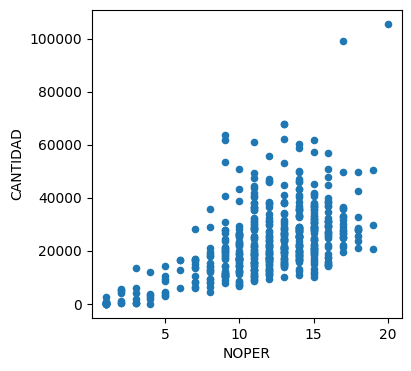

In [52]:
# efectuamos la representacion grafica de los datos respecto a nuestra variable objetivo:
fig, ax = subplots(figsize=(4,4))

# para CANTIDAD
logdf_aggr.plot(x='NOPER', y='CANTIDAD', kind='scatter', ax=ax)

<Axes: xlabel='NOPER', ylabel='LINEAS'>

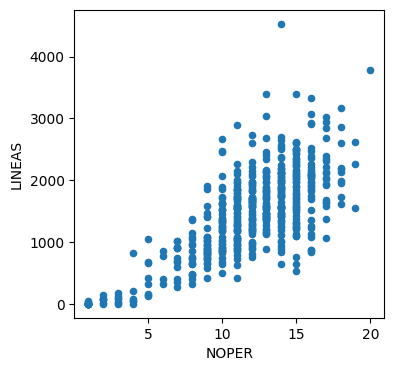

In [53]:
# para LINEAS
fig, ax = subplots(figsize=(4,4))
logdf_aggr.plot(x='NOPER', y='LINEAS', kind='scatter', ax=ax)

In [54]:
# efectuamos el análisis de correlación:
corr = logdf_aggr.corr()
corr

,CANTIDAD,LINEAS,NOPER
CANTIDAD,1.000000,0.741878,0.553824
LINEAS,0.741878,1.000000,0.744760
NOPER,0.553824,0.744760,1.000000


<Axes: >

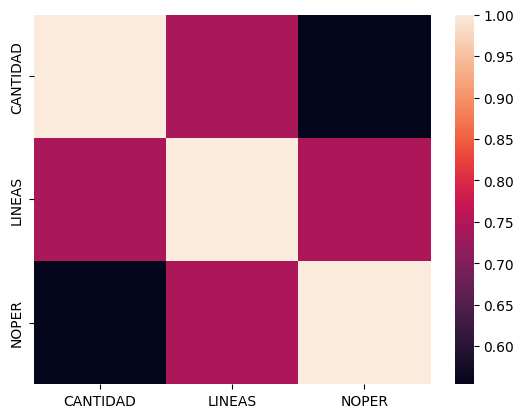

In [55]:
# graficamos la correlacion mediante heatmap
sns.heatmap(corr)

### Observamos para nuestra variable objetivo NOPER que existe correlacion positiva tanto para LINEAS (0.74) y CANTIDAD (0.55)
### Entonces existe una relación lineal

# REGRESIÓN LINEAL

In [56]:
!pip install statsmodels

In [57]:
!pip install scikit-learn

In [58]:
# importamos las librerias necesarias
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [59]:
# dividimos nuestras variables dependientes e independientes
Y = logdf_aggr['NOPER']
X = logdf_aggr[['CANTIDAD','LINEAS']]


In [60]:
# efectuamos el split con 70% de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

In [61]:
# veamos cuantos tiene cada uno:
print("X_train:", len(x_train))
print("X_test:", len(x_test))
print("Y_train:", len(y_train))
print("Y_test:", len(y_test))

X_train: 376
X_test: 162
Y_train: 376
Y_test: 162


In [62]:
x_train

,CANTIDAD,LINEAS
FECHAC,,
23/02/2023,37931,3035
24/02/2022,18527,910
13/01/2022,17392,1260
06/12/2022,35724,2646
26/01/2022,18685,1323
...,...,...
30/10/2023,28219,2115
29/08/2023,25700,1563
23/12/2022,23187,1348


## CON STATSMODEL

In [63]:
# agregamos un intercept con 1 a las variables independientes
x_train = sm.add_constant(x_train)
x_train

,const,CANTIDAD,LINEAS
FECHAC,,,
23/02/2023,1.0,37931,3035
24/02/2022,1.0,18527,910
13/01/2022,1.0,17392,1260
06/12/2022,1.0,35724,2646
26/01/2022,1.0,18685,1323
...,...,...,...
30/10/2023,1.0,28219,2115
29/08/2023,1.0,25700,1563
23/12/2022,1.0,23187,1348


In [64]:
# creamos el modelo y lo ajustamos utilizando OLS
modelo = sm.OLS(y_train, x_train)
resultado = modelo.fit()
resultado.params

const       5.923622
CANTIDAD    0.000002
LINEAS      0.003934
dtype: float64

In [65]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  NOPER   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     237.3
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           3.30e-67
Time:                        19:47:41   Log-Likelihood:                -888.32
No. Observations:                 376   AIC:                             1783.
Df Residuals:                     373   BIC:                             1794.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9236      0.302     19.629      0.0

### El valor R-squared es de 56.3%, es decir que el modelo puede predecir el 57% de las veces con aproximación

In [66]:
# efectuaremos una prediccion sobre los valores test y compararemos con al realidad, hayq ue agregar la constante en x_test
x_test = sm.add_constant(x_test)
x_test

,const,CANTIDAD,LINEAS
FECHAC,,,
13/10/2022,1.0,13578,990
11/02/2023,1.0,2504,44
02/09/2022,1.0,14072,732
15/09/2023,1.0,10572,859
25/05/2022,1.0,20698,1552
...,...,...,...
21/01/2022,1.0,36300,1473
09/07/2022,1.0,16841,351
08/10/2022,1.0,1660,41


In [67]:
# efectuaremos una prediccion sobre los datos de test
y_test_pred = resultado.predict(x_test)
y_test_pred

FECHAC
13/10/2022     9.851656
11/02/2023     6.102844
02/09/2022     8.837838
15/09/2023     9.328932
25/05/2022    12.080074
                ...    
21/01/2022    11.807385
09/07/2022     7.345669
08/10/2022     6.088979
31/10/2023    12.943492
27/05/2022     8.473301
Length: 162, dtype: float64

In [68]:
# unimos el test con la predicción
comparacion = x_test.merge(y_test, left_index=True, right_index=True)
comparacion = comparacion.merge(pd.DataFrame(y_test_pred), left_index=True, right_index=True)
comparacion = comparacion.drop(columns=['const'])
comparacion.columns = ['CANTIDAD','LINEAS','NOPER_REAL','NOPER_PRED']
comparacion['NOPER_PRED'] = round(comparacion['NOPER_PRED'],0)
comparacion['NOPER_PRED'] = comparacion['NOPER_PRED'].astype('int')
comparacion

,CANTIDAD,LINEAS,NOPER_REAL,NOPER_PRED
FECHAC,,,,
13/10/2022,13578,990,12,10
11/02/2023,2504,44,4,6
02/09/2022,14072,732,8,9
15/09/2023,10572,859,9,9
25/05/2022,20698,1552,19,12
...,...,...,...,...
21/01/2022,36300,1473,11,12
09/07/2022,16841,351,7,7
08/10/2022,1660,41,4,6


In [69]:
resultado.predict([[1,30938,1969]])

array([13.7456538])

# Observamos que en efecto el modelo si bien se acerca no predice muy bien
# --> entonces se deben efectuar ajustes al modelo, quizas tratamiento de outliers

In [70]:
# encontramos que el error estiamdo por el métodod 
from sklearn.metrics import mean_squared_error
rmse_rm = mean_squared_error(y_true  = y_test, y_pred  = y_test_pred, squared = False)
print(f"El error (rmse) de test es: {rmse_rm}")

El error (rmse) de test es: 2.410457520400003


## El error de 2.57 significa que la predicción se aleja en promedio en 2.57 del valor real

# CORRECION AL MODELO

In [76]:
logdf_aggr.describe()

,CANTIDAD,LINEAS,NOPER
count,538.000000,538.000000,538.000000
mean,23343.416357,1460.202602,11.765799
std,13396.219207,706.435874,3.782861
min,2.000000,1.000000,1.000000
25%,14988.750000,978.750000,10.000000
50%,21475.000000,1476.500000,12.000000
75%,29363.500000,1920.500000,14.000000
max,105588.000000,4533.000000,20.000000


<Axes: ylabel='LINEAS'>

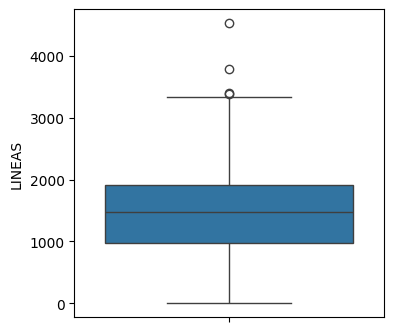

In [73]:
# Efectuaremos la limpieza de outliers para ver si incide en en los resultados
# efectuando los diagramas de caja de nuestra dos variables independientes
import seaborn as sns

fig, ax = subplots(figsize=(4,4))

sns.boxplot(logdf_aggr['LINEAS'])

<Axes: ylabel='CANTIDAD'>

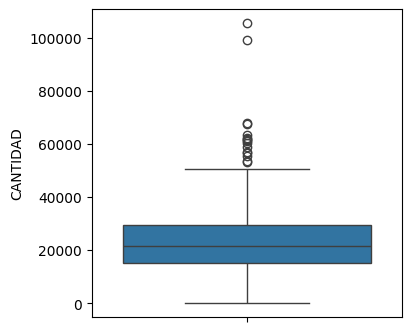

In [75]:
fig, ax = subplots(figsize=(4,4))
sns.boxplot(logdf_aggr['CANTIDAD'])

In [77]:
logdf_aggr.shape   # -->  existen 538 registros antes de la limpieza de outliers

(538, 3)

In [86]:
# Efectuamos una reducción de outliers utilizando el método de puntuacoióm Z-score
import numpy as np
import scipy.stats as stats

# Encontramos el valor z-score de cada observación
z = np.abs(stats.zscore(logdf_aggr))
# Solo mantenemos las filas con puntuación z menor que el valor absoluto de 3 
logdf_clean = logdf_aggr[(z<3).all(axis=1)]
# Calculamos cuantas filas quedan
logdf_clean.shape


(532, 3)

### se eliminaron 6 registros de valore atípicos tras la limpieza

<Axes: ylabel='LINEAS'>

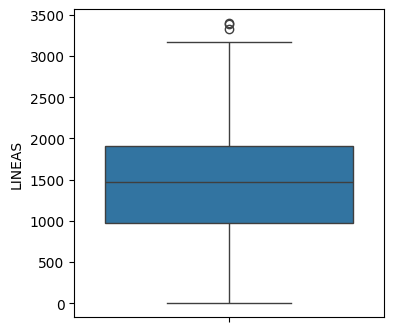

In [87]:
# vemos cómo quedan nuestros boxplots tras la reducción

fig, ax = subplots(figsize=(4,4))

sns.boxplot(logdf_clean['LINEAS'])

<Axes: ylabel='CANTIDAD'>

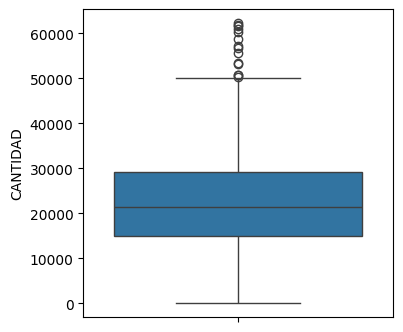

In [88]:
fig, ax = subplots(figsize=(4,4))
sns.boxplot(logdf_clean['CANTIDAD'])

## REGRESION NUEVA

In [89]:
# dividimos nuestras variables dependientes e independientes en el df limpio
Y = logdf_clean['NOPER']
X = logdf_clean[['CANTIDAD','LINEAS']]

In [90]:
# efectuamos el split con 70% de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

In [91]:
# agregamos un intercept con 1 a las variables independientes
x_train = sm.add_constant(x_train)
x_train

,const,CANTIDAD,LINEAS
FECHAC,,,
30/05/2022,1.0,34062,2039
17/09/2022,1.0,20,3
19/05/2023,1.0,11518,762
15/07/2023,1.0,3187,136
23/05/2022,1.0,15116,1350
...,...,...,...
06/07/2023,1.0,10408,1028
02/04/2022,1.0,5130,82
19/12/2022,1.0,41055,1854


In [92]:
# creamos el modelo y lo ajustamos utilizando OLS
modelo = sm.OLS(y_train, x_train)
resultado = modelo.fit()
resultado.params

const       5.527163
CANTIDAD    0.000009
LINEAS      0.004152
dtype: float64

In [93]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  NOPER   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     255.8
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.98e-70
Time:                        20:32:03   Log-Likelihood:                -869.52
No. Observations:                 372   AIC:                             1745.
Df Residuals:                     369   BIC:                             1757.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5272      0.305     18.135      0.0

## OBSERVAMOS QUE MEJORAMOS UN POCO nuestro valor de R-squared a 58.1%

In [94]:
# efectuaremos una prediccion sobre los valores test y compararemos con al realidad, hayq ue agregar la constante en x_test
x_test = sm.add_constant(x_test)
x_test

,const,CANTIDAD,LINEAS
FECHAC,,,
04/01/2022,1.0,33897,1819
07/05/2022,1.0,10412,412
15/11/2023,1.0,17222,1733
02/02/2023,1.0,21684,1544
13/09/2022,1.0,35213,2203
...,...,...,...
09/05/2023,1.0,27588,2001
18/05/2023,1.0,20770,1525
08/12/2023,1.0,19630,873


In [95]:
# efectuaremos una prediccion sobre los datos de test
y_test_pred = resultado.predict(x_test)
y_test_pred

FECHAC
04/01/2022    13.368574
07/05/2022     7.326527
15/11/2023    12.869410
02/02/2023    12.122693
13/09/2022    14.974173
                ...    
09/05/2023    14.070487
18/05/2023    12.036016
08/12/2023     9.319168
27/11/2023    15.108225
13/10/2022     9.753388
Length: 160, dtype: float64

In [96]:
# encontramos que el error estiamdo por el métodod 
from sklearn.metrics import mean_squared_error
rmse_rm = mean_squared_error(y_true  = y_test, y_pred  = y_test_pred, squared = False)
print(f"El error (rmse) de test es: {rmse_rm}")

El error (rmse) de test es: 2.4643964391718294


## nuestro valor de predicciones ahora es de 2.46, mejorando un poco

# CONCLUSIONES
* Nuestro modelo mejorado tiene un nivel de exactitud de 58.1%, es decir, en ese porcentaje nuestro modelo de regresión predice la realidad
* Asimismo nuestras predicciones se alejan un 2.46 de los valores reales en promedio
* Si bien nuestro modelo puede predecir con mediana exactitud nos sirve para contratar nuevo personal de acuerdo a las líneas y cantidades solicitadas por día
* Es necesario efectuar nuevos análisis y quizñas aplicar otros métodos para mejorar los resultados